In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [30]:
conn = sqlite3.connect('rating.db')
c = conn.cursor()

In [31]:
moviesCSV = pd.read_csv('movies_60K.csv')

In [32]:
%%time
HRM =c.execute('select movieId from tab where rating=4.0 or rating=4.5 or rating=5')

Wall time: 4.83 ms


In [33]:
result = list(c)

In [34]:
HRM_l = []
for sublist in result:
    for element in sublist:
        HRM_l.append(element)


In [35]:
mId = list(dict.fromkeys(HRM_l))
mId.sort()

In [36]:
y1=0
year = []
no_year = 0
for x1 in range(len(moviesCSV)) : 
    if moviesCSV.movieId[x1] == mId[y1] :  
        y1 +=1
        title = moviesCSV.title[x1]
        yr = title.split('(')[-1]
        a = yr[0:4]
        if a.isdigit() :
            year.append(a)
        else : 
            no_year += 1

In [37]:
tens = 0
aughts = 0
ninties = 0
eighties = 0
seventies = 0
sixties = 0
fifties = 0
forties = 0
thirties = 0
twenties = 0

In [24]:
for x in range(len(year)):
    if int(year[x])>2010 and int(year[x])<2021 :
        tens +=1
    elif int(year[x])>2000 and int(year[x])<2011 :
        aughts +=1
    elif int(year[x])>1990 and int(year[x])<2001 :
        ninties +=1
    elif int(year[x])>1980 and int(year[x])<1991 :
        eighties +=1
    elif int(year[x])>1970 and int(year[x])<1981 :
        seventies +=1
    elif int(year[x])>1960 and int(year[x])<1971 :
        sixties +=1
    elif int(year[x])>1950 and int(year[x])<1961 :
        fifties +=1
    elif int(year[x])>1940 and int(year[x])<1951 :
        forties +=1
    elif int(year[x])>1930 and int(year[x])<1941 :
        thirties +=1
    elif int(year[x])>1920 and int(year[x])<1931 :
        twenties +=1

In [25]:
count = [twenties,thirties,forties,fifties,sixties,seventies,eighties,ninties,aughts,tens]
x_a = [] 
for x2 in range(192,202) :
    x_a.append(x2*10)

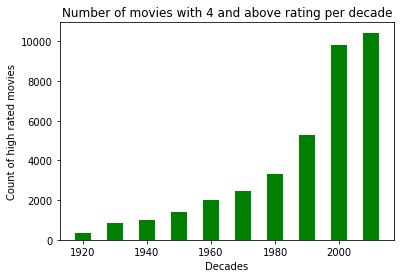

In [28]:
plt.bar(x_a,count,color='green',width=5)
plt.xlabel("Decades")
plt.ylabel("Count of high rated movies")
plt.title("Number of movies with 4 and above rating per decade")
plt.show()